In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from sktime.forecasting.arima import ARIMA

In [2]:
y = load_airline()

In [3]:
random_data = np.random.random((y.shape[0], 3))
cols = [f"X{i+1}" for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.550081,0.523970,0.777511
1949-02,0.487269,0.421237,0.565878
1949-03,0.765282,0.954219,0.940856
1949-04,0.852391,0.170107,0.875966
1949-05,0.938671,0.468957,0.690692


In [4]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [5]:
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

(108,) (36,)
(108, 3) (36, 3)


In [6]:
fh = np.arange(1, 37)
forecaster = ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))

In [7]:
# No exogenous data
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=fh)

In [8]:
# With exogenous data
forecaster.fit(y_train, X=X_train)
y_pred_ex = forecaster.predict(fh=fh, X=X_test)

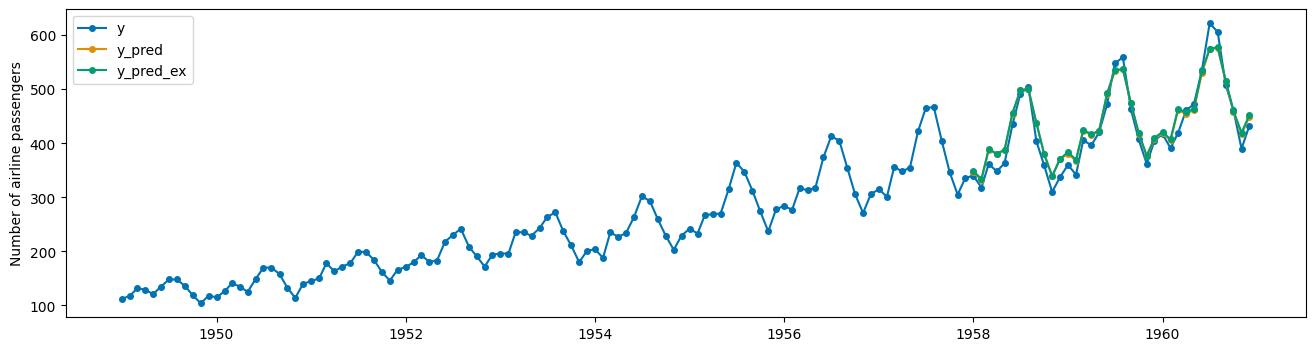

In [9]:
plot_series(y, y_pred, y_pred_ex, labels=["y", "y_pred", "y_pred_ex"])
plt.show()

In [10]:
# Exogeneous data does not affect the performance of the model, which is good.
print(mean_absolute_percentage_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred_ex))

0.04356744950206401
0.04556953853379534
